<a href="https://colab.research.google.com/github/kokikudo/submit_an_assignment/blob/master/Sprint3__Basics_of_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.このテキストについて

* テキストの目的

線形回帰の基礎を知る
行列計算の意義を知る
理論から実装への橋渡し

* どのように学ぶか

まずは一変数で線形回帰の基本を考えます。そこから線形代数を利用して多変数に発展させていきます。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

In [ ]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter=1000, lr=0.001, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        x1 = X
        x0 = np.ones(x1.shape[0]).reshape(-1, 1)
    
        return np.concatenate([x0, x1],axis=1)
    
    def _gradient_descent(self, X, error):
        """
        最急降下法により、θの値を更新し、学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        error : 真の値と推定した値の誤差
        """
        self.theta = self.theta - self.lr*np.dot(error,X)/len(X)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。
        検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """

        # バイアス項有無で分岐
        if self.no_bias is not True:   
            # パラメータθの初期値を乱数で与える
            x1 = self._linear_hypothesis(X)
            # θはXの特徴量の種類の数分用意する
            self.theta = np.random.random(x1.shape[1])
        else:
            x1 = X
            self.theta = np.random.random(x1.shape[1])
        
        for i in range(self.iter):
            
            # 仮定関数で予測値を計算
            y1 = np.dot(x1,self.theta.T)
            
            # 真の値と予測値の誤差を計算
            error = y1 - y
            self.loss[i] += np.mean(error**2)/2
            
            # X_validを入力した場合は、x2として読み込む
            if X_val is not None:
                if self.no_bias is not True:
                    x2 = self._linear_hypothesis(X_val)
                else:
                    x2 = X_val
                y2 = np.dot(x2,self.theta)
                
                error_val = y2 - y_val
                self.val_loss[i] += np.mean(error_val**2)/2 
            
            # パラメータθを最急降下法で、最適化
            self._gradient_descent(x1, error)
            
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
                
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.no_bias is not True:
            return np.dot(self._linear_hypothesis(X),self.theta)
        return np.dot(X,self.theta)

## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$$
h_θ
(
x
)
=
θ_0
x_0
+
θ_1
x_1
+
.
.
.
+
θ_j
x_j
+
.
.
.
+
θ_n
x_n
.
(
x_0
=
1
)
$$
x
 : 特徴量ベクトル


θ
 : パラメータベクトル


n
 : 特徴量の数


x
j
 : j番目の特徴量


θ
j
 : j番目のパラメータ（重み）


特徴量の数
n
は任意の値に対応できる実装にしてください。


なお、ベクトル形式で表すと以下のようになります。

$$
h_θ
(
x
)
=
θ^T
⋅
x
.
$$

In [ ]:
def _linear_hypothesis(self, X, theta):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    x1 = X
    x0 = np.ones(x1.shape[0])
    return np.concatenate([x0.reshape(-1, 1), x1.reshape(-1, 1)], axis=1) 

In [ ]:
x = np.arange(10)
y = np.arange(10, 20)

# x_0=1を要素の先頭に追加
X = np.concatenate([np.ones(x.shape[0]).reshape(-1, 1), x.reshape(-1, 1)], axis=1)

# θ　処理を重ねるごとに値が収束する
theta = np.random.rand(X.shape[1])

# 予測値（説明変数とθの内積）
# 処理を重ねるたびに正解値に近く
y_pred = np.dot(X, theta)
y_pred

array([0.76352802, 1.5603137 , 2.35709938, 3.15388506, 3.95067074,
       4.74745642, 5.54424211, 6.34102779, 7.13781347, 7.93459915])

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。

In [ ]:
x = np.arange(10)
y = np.arange(10, 20)

# x_0=1を要素の先頭に追加
X = np.concatenate([np.ones(x.shape[0]).reshape(-1, 1), x.reshape(-1, 1)], axis=1)

# θ　これが更新され続け、yの値に近づいていく
theta = np.random.rand(X.shape[1])

y_pred = np.dot(X, theta)

alpha = 0.01

error = (y - y_pred)

theta[0] = theta[0] - alpha*np.mean(error)
theta[1] = theta[1] - alpha*np.mean(error)

In [ ]:
np.mean(error)

10.165851626472978

In [ ]:
np.mean(error*x)

47.509389910139106

In [ ]:
# 内積計算
np.dot(error, X)

array([101.65851626, 475.0938991 ])

In [ ]:
# thetaを一回更新してみる
# np.dot(error, X)/len(X)でaより後ろの計算式が成り立つ。
theta = theta - alpha*np.dot(error, X)/len(X)
theta

array([0.59249912, 0.20954363])

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

## 【問題3】推定
推定する仕組みを実装してください。
ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数の出力が推定結果です。

In [ ]:
X = np.random.randn(30, 1)
y = np.random.randn(30, )
X_test = np.random.randn(5, 1)

In [ ]:
X.max()

2.23102748600246

In [ ]:
print('X.shape:', X.shape)
print('y.shape:', y.shape)

X.shape: (30, 1)
y.shape: (30,)


In [ ]:
reg = ScratchLinearRegression(num_iter=10000, lr=1e-4, verbose=False)

reg.fit(X, y)
y_pred = reg.predict(X_test)

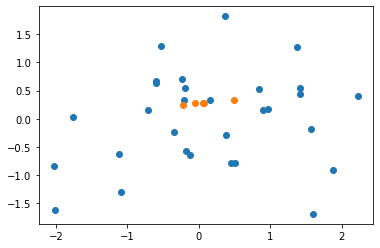

In [ ]:
plt.scatter(X, y)
plt.scatter(X_test, y_pred)
plt.plot();

## 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。

$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2
$$

In [ ]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = ((y_pred - y)**2)
    return np.mean(mse)

In [ ]:
y_true = np.array([5, 2, 4, 6, 7])
y_pred = np.array([4, 6, 8, 3, 2])

ave_squared_error = MSE(y_pred, y_true)

print('平均2乗誤差:', ave_squared_error)

平均2乗誤差: 13.4


In [ ]:
# sklearnと比較
from sklearn.metrics import mean_squared_error

ave_squared_error = mean_squared_error(y_pred, y_true)

print('平均2乗誤差:', ave_squared_error)

平均2乗誤差: 13.4


## 【問題5】目的関数
以下の数式で表される線形回帰の **目的関数（損失関数）** を実装してください。
そして、これをself.loss, self.val_lossに記録するようにしてください。

$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2
$$

クラスの中にコードを記載

In [ ]:
# 損失関数の値の確認
print(reg.loss.shape)
reg.loss.reshape(-1, 1)

(10000,)


array([[0.70298096],
       [0.70290395],
       [0.70282695],
       ...,
       [0.38187099],
       [0.38186135],
       [0.38185172]])

In [ ]:
# 検証値の損失関数の値の記録を確認
X = np.random.randn(75, 1)
y = np.random.randn(75, )
X_valid = np.random.randn(25, 1)
y_valid = np.random.randn(25, )

reg = ScratchLinearRegression()
reg.fit(X, y, X_valid, y_valid)

print('予測値の損失関数の値：　', reg.loss.reshape(-1, 1)[:10])
print('検証値の損失関数の値：　', reg.val_loss.reshape(-1, 1)[:10])


予測値の損失関数の値：　 [[1.0337293 ]
 [1.03290425]
 [1.03208058]
 [1.0312583 ]
 [1.03043739]
 [1.02961787]
 [1.02879972]
 [1.02798294]
 [1.02716754]
 [1.0263535 ]]
検証値の損失関数の値：　 [[0.57235632]
 [0.57193883]
 [0.57152203]
 [0.57110594]
 [0.57069055]
 [0.57027585]
 [0.56986185]
 [0.56944855]
 [0.56903593]
 [0.56862402]]


## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [ ]:
train = pd.read_csv('/Users/kudokoki/dive-practice/downroad_data_sets/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
X = train.loc[:, ['YearBuilt']].values
X.shape

(1460, 1)

In [ ]:
y = train.loc[:, ["SalePrice"]].values
y = y.reshape(-1)
y.shape

(1460,)

In [ ]:
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, random_state=2)

In [ ]:
X_train.shape

(1095, 1)

In [ ]:
X_valid.shape

(365, 1)

In [ ]:
y_train.shape

(1095,)

In [ ]:
y_valid.shape

(365,)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

平均2乗誤差mse= 10539523336.679613
分散= 102662.18065421956


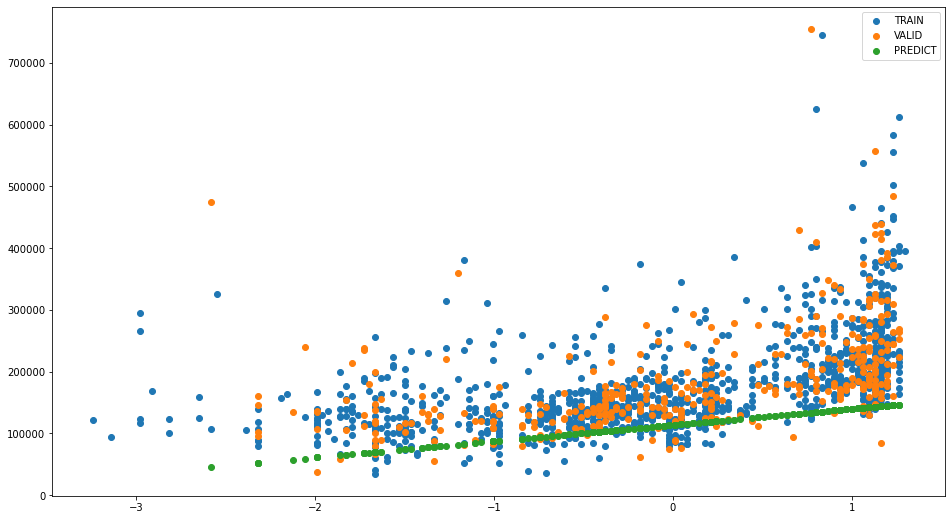

In [ ]:
# スクラッチ
reg = ScratchLinearRegression()
reg.fit(X_train_std, y_train, X_valid_std, y_valid)

y_pred = reg.predict(X_valid_std)

#可視化
fig = plt.figure(figsize=(16, 9))
plt.scatter(X_train_std, y_train, label='TRAIN')
plt.scatter(X_valid_std, y_valid, label='VALID')
plt.scatter(X_valid_std, y_pred, label='PREDICT')
plt.legend()

# 平均2乗誤差
mse = MSE(y_pred, y_valid)
print('平均2乗誤差mse=', mse)
print('分散=', np.sqrt(mse))

平均2乗誤差mse= 5401630953.088973
分散= 73495.78867587566


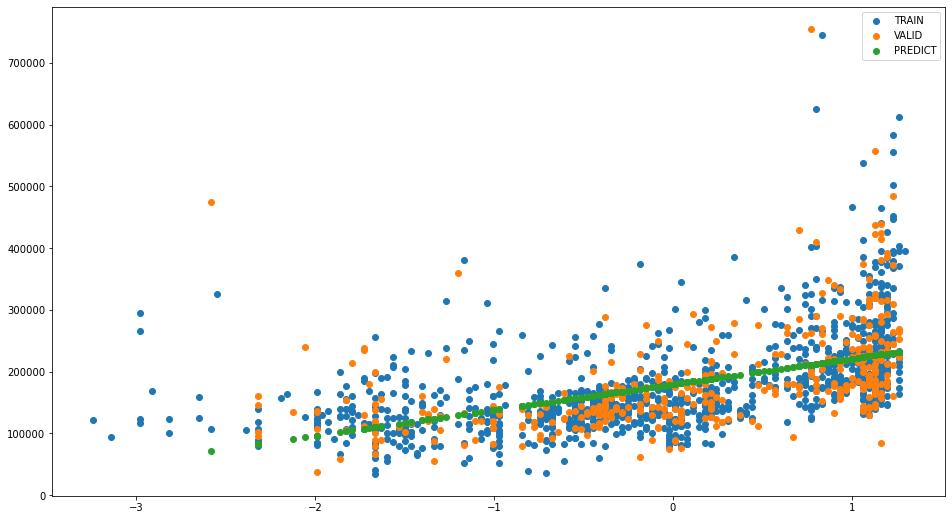

In [ ]:
# skleran
from sklearn.linear_model import LinearRegression 

true_reg = LinearRegression()
true_reg.fit(X_train_std, y_train)
true_y_pred = true_reg.predict(X_valid_std)

#可視化
fig = plt.figure(figsize=(16, 9))
plt.scatter(X_train_std, y_train, label='TRAIN')
plt.scatter(X_valid_std, y_valid, label='VALID')
plt.scatter(X_valid_std, true_y_pred, label='PREDICT')
plt.legend()

# 平均2乗誤差
mse = MSE(true_y_pred, y_valid)
print('平均2乗誤差mse=', mse)
print('分散=', np.sqrt(mse))

スクラッチ関数で処理した予測値は、Sklearnのモデルで学習した予測値より低くなった。

## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。


線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

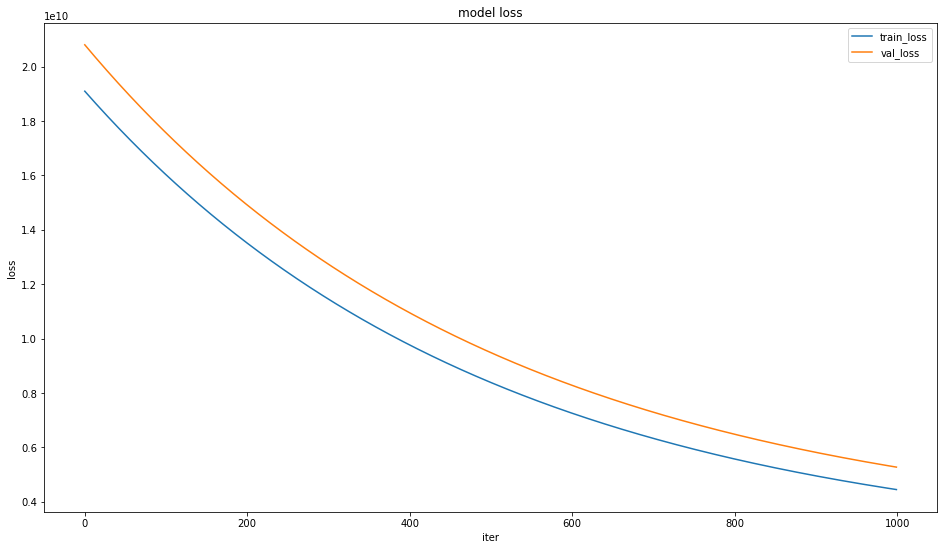

In [ ]:
fig = plt.figure(figsize=(16, 9))

plt.title('model loss')
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(reg.loss, label='train_loss')
plt.plot(reg.val_loss, label='val_loss')
plt.legend();

平均2乗誤差mse= 18967330626.64695
分散= 137721.9322644253


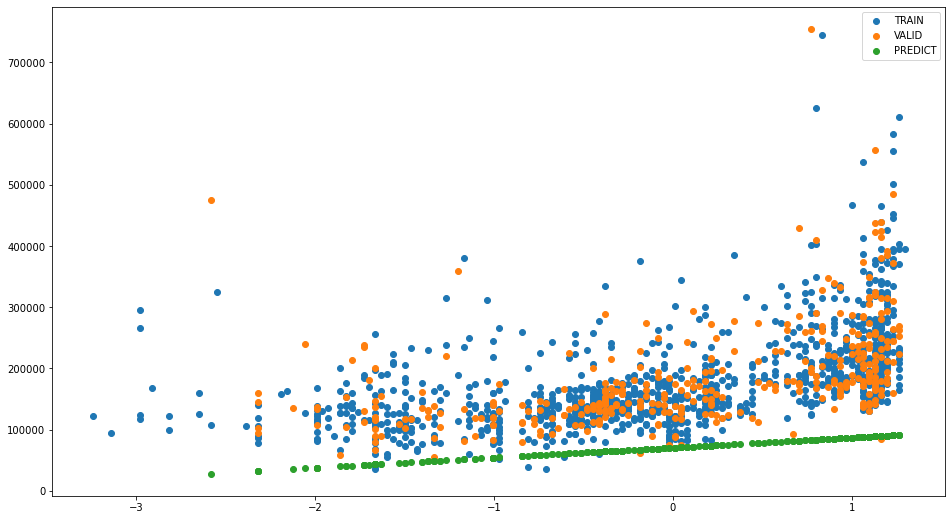

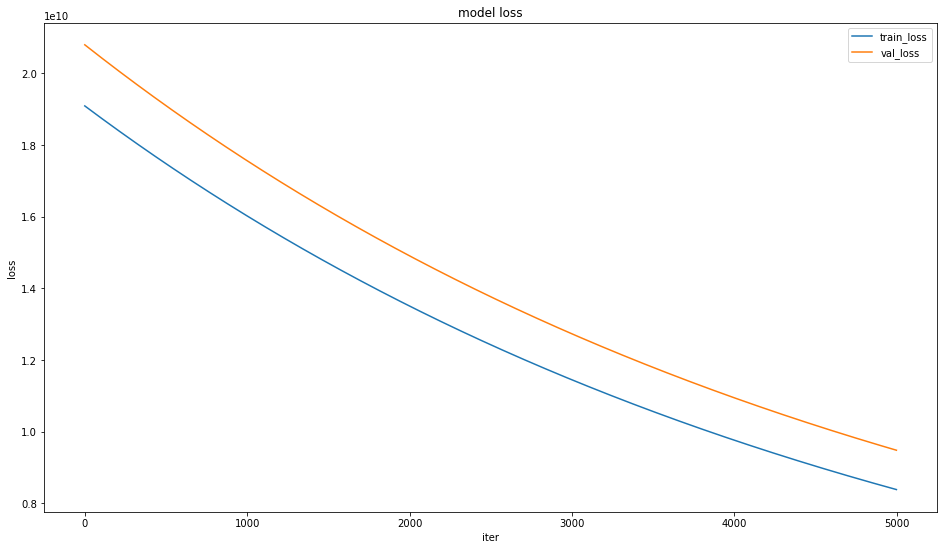

In [ ]:
# 学習条件を変えてみる
reg_rev1 = ScratchLinearRegression(num_iter=5000, lr=1e-4)
reg_rev1.fit(X_train_std, y_train, X_valid_std, y_valid)
y_pred_rev1 = reg_rev1.predict(X_valid_std)

#可視化
fig = plt.figure(figsize=(16, 9))
plt.scatter(X_train_std, y_train, label='TRAIN')
plt.scatter(X_valid_std, y_valid, label='VALID')
plt.scatter(X_valid_std, y_pred_rev1, label='PREDICT')
plt.legend()

# 平均2乗誤差
mse_rev1 = MSE(y_pred_rev1, y_valid)
print('平均2乗誤差mse=', mse_rev1)
print('分散=', np.sqrt(mse_rev1))

# 可視化
fig = plt.figure(figsize=(16, 9))
plt.title('model loss')
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(reg_rev1.loss, label='train_loss')
plt.plot(reg_rev1.val_loss, label='val_loss')
plt.legend();

## 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 $θ_0$を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

平均2乗誤差mse= 39995181409.043976
分散= 199987.95315979404


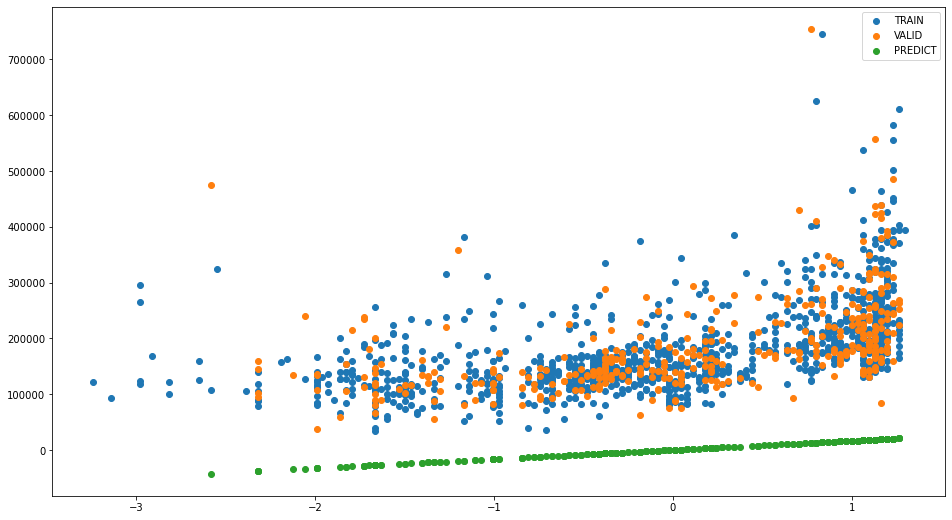

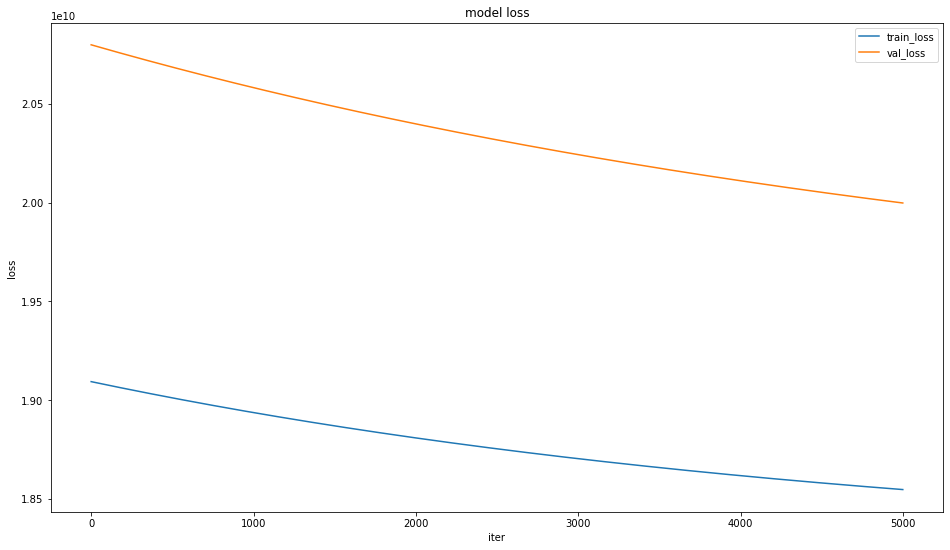

In [ ]:
# バイアス項なし
reg_rev1 = ScratchLinearRegression(num_iter=5000, lr=1e-4, no_bias=True)
reg_rev1.fit(X_train_std, y_train, X_valid_std, y_valid)
y_pred_rev1 = reg_rev1.predict(X_valid_std)

#可視化
fig = plt.figure(figsize=(16, 9))
plt.scatter(X_train_std, y_train, label='TRAIN')
plt.scatter(X_valid_std, y_valid, label='VALID')
plt.scatter(X_valid_std, y_pred_rev1, label='PREDICT')
plt.legend()

# 平均2乗誤差
mse_rev1 = MSE(y_pred_rev1, y_valid)
print('平均2乗誤差mse=', mse_rev1)
print('分散=', np.sqrt(mse_rev1))

# 可視化
fig = plt.figure(figsize=(16, 9))
plt.title('model loss')
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(reg_rev1.loss, label='train_loss')
plt.plot(reg_rev1.val_loss, label='val_loss')
plt.legend();

予測値が大幅に低下した。バイアスは予測値を低下を防ぐための調整機能の役割があるのではないか。

→　バイアスは一次関数でいう切片である。つまり、バイアスがないと原点を通るようなモデルになってしまい、各データに近しい直線にならない。

参考画像：[PRMLの線形回帰モデル（線形基底関数モデル）](https://www.slideshare.net/yasunoriozaki12/prml-29439402)
<img width="500" alt="非表示のときの名前" src="https://image.slidesharecdn.com/random-131223004858-phpapp02/95/prml-29-638.jpg?cb=1420232764">

## 【問題9】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください

In [ ]:
mulch_X = train[['YearBuilt', 'LotArea', 'MoSold']]

mulch_X = mulch_X.values

In [ ]:
mX_train, mX_valid, my_train, my_valid = \
    train_test_split(mulch_X, y, random_state=2)

print("mX_train.shape:", mX_train.shape)
print("mX_valid.shape:", mX_valid.shape)
print("my_train.shape:", my_train.shape)
print("my_valid.shape:", my_valid.shape)

mX_train.shape: (1095, 3)
mX_valid.shape: (365, 3)
my_train.shape: (1095,)
my_valid.shape: (365,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(mX_train)

mX_train_std = scaler.transform(mX_train)
mX_valid_std = scaler.transform(mX_valid)

平均2乗誤差mse= 18751796887.062035
分散= 136937.20052294788


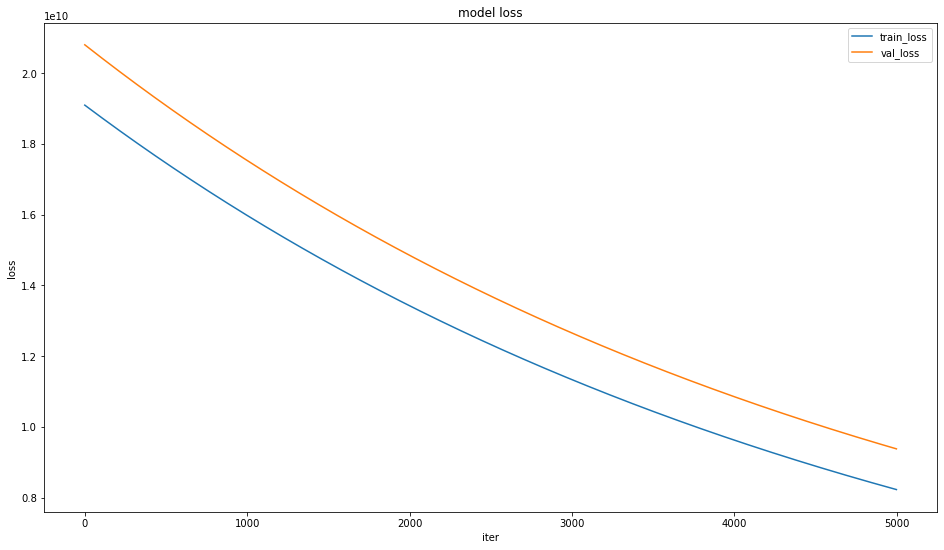

In [ ]:
mulch_reg = ScratchLinearRegression(num_iter=5000, lr=1e-4)
mulch_reg.fit(mX_train_std, my_train, mX_valid_std, my_valid)
mulch_y_pred = mulch_reg.predict(mX_valid_std)

"""#可視化   4次元以上なので可視化不可
fig = plt.figure(figsize=(16, 9))
plt.scatter(mX_train_std, my_train, label='TRAIN')
plt.scatter(mX_valid_std, my_valid, label='VALID')
plt.scatter(mX_valid_std, mulch_y_pred, label='PREDICT')
plt.legend()"""

# 平均2乗誤差
mulch_mse = MSE(mulch_y_pred, my_valid)
print('平均2乗誤差mse=', mulch_mse)
print('分散=', np.sqrt(mulch_mse))

# 可視化
fig = plt.figure(figsize=(16, 9))
plt.title('model loss')
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(mulch_reg.loss, label='train_loss')
plt.plot(mulch_reg.val_loss, label='val_loss')
plt.legend();

あまり変化がない印象。

In [ ]:
# 説明変数10個で学習してみる
select_train = train.drop(['Id', "SalePrice"], axis=1)
select_train = select_train.select_dtypes('number')
select_train = select_train.dropna()
select_feature = list(select_train.columns[:7])
select_feature

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd']

平均2乗誤差mse= nan
分散= nan


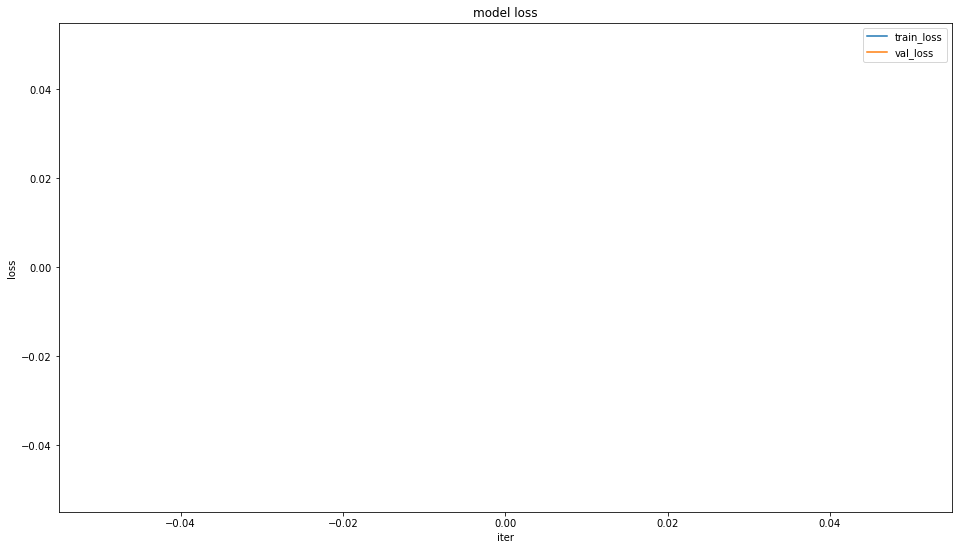

In [ ]:
# 変数を増やしてみる
mulch_X = train[select_feature]

mulch_X = mulch_X.values

mX_train, mX_valid, my_train, my_valid = \
    train_test_split(mulch_X, y, random_state=2)

scaler = StandardScaler()

scaler.fit(mX_train)

mX_train_std = scaler.transform(mX_train)
mX_valid_std = scaler.transform(mX_valid)

mulch_reg = ScratchLinearRegression(num_iter=15000, lr=1e-4)
mulch_reg.fit(mX_train_std, my_train, mX_valid_std, my_valid)
mulch_y_pred = mulch_reg.predict(mX_valid_std)

mulch_mse = MSE(mulch_y_pred, my_valid)
print('平均2乗誤差mse=', mulch_mse)
print('分散=', np.sqrt(mulch_mse))

fig = plt.figure(figsize=(16, 9))
plt.title('model loss')
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(mulch_reg.loss, label='train_loss')
plt.plot(mulch_reg.val_loss, label='val_loss')
plt.legend();

なぜかlossとval_lossがnanとなってグラフに描写されない。

調べても分からなかったので次に行く。

## 【問題10】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

$$
①\quad \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

以下の式から説明をはじめることができます。

$$
②\quad\theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\
$$

目的関数（損失関数） 
J
(
θ
)
 は次の式です。
$$
③\quad　J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$



参考サイト：　[最急降下法を死ぬほど理解する。機械学習入門②](https://eng.internnect.co.jp/machinelearning-2/)

最急降下法の目的は目的関数を最小化するパラメータの探索にある。
>* ③目的関数式の説明<br>
>各データの予測値と正解値の誤差の平均を導き出す式。
>誤差がーをとることを防ぐために2乗している。
>また、微分した時に2乗が2の係数となって出てきてしまうので、事前に2を分母に入れておく。

目的関数J(θ)の式は2乗の式があるため二次関数なのがわかる。
二次関数のグラフは下記のように**下に凹んでいる。**
<img width="400" alt="非表示のときの名前" src="https://eng.internnect.co.jp/wp-content/uploads/2020/08/image-2-300x255.png">

凹んでいる部分＝傾きが0になる時が目的関数が最小になる、と解釈できる。
つまり、現在の傾きにマイナスをかけるとどんどん下に降っていく。
<img width="400" alt="非表示のときの名前" src="https://eng.internnect.co.jp/wp-content/uploads/2020/08/function_explanation-1.png">

②の式はj番目のパラメータ$θ_j$について微分し、j-1番目のパロメータに引いてあげてパロメータを更新する式である。

②の式を展開したのが①である。

## 【問題11】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

参考サイト：　[Qiita　全体最適解と局所最適解](https://qiita.com/9ryuuuuu/items/ab361d00af32f71c1f89)

* 局所最適解とは？
グラフ全体から一番値が低い地点を探す「全体最適解」とは違い、グラフのある範囲内から一番低い値を見つける（最適化する）こと。問題点として、範囲外に一番低い値がある可能性があることが挙げられる。

<img width="400" alt="非表示のときの名前" src="https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.amazonaws.com%2F0%2F321994%2F3d69b1ba-0f34-23ce-b6ee-0211373291a6.png?ixlib=rb-1.2.2&auto=format&gif-q=60&q=75&w=1400&fit=max&s=b188407acb192172e90823df4513a7d4">

どこが一番低いかわからない。

いろいろなサイトを見たが、いまいち理解することができなかった。